# Making custom colour maps
---
This notebook is part 5/5 of a tutorial based on the [```colourspace```](https://github.com/gillesferrand/colourspace) package.

In [1]:
from colourspace import maps

convertor = ' custom '


<module 'colourspace.maps' from '/Users/gferrand/simus/colour/colourspace/maps.pyc'>

The ```maps``` module deals with the custom generation of perceptually-correct colour maps. Working in LCH allows us to manipulate independently the three dimensions of colours: lightness, chroma, hue. We will demonstrate this with three kinds of cmaps, that cannot be easily produced when working in RGB or its derivatives:
- equi-luminant, stepping in H at Cmax
- diverging, stepping in C at a given L from one H to another
- mono-hue, stepping in L at Cmax

For each map, we draw a simple path in LCH space for each coordinate, then convert the list of colours to RGB using ```convert```. For all three cmap making functions, ```res``` is the number of steps per unit of the quantity L,C,H that is being stepped through. As before, colours out of the sRGB gamut are discarded if ```mode='crop'```, or just have their values clipped if ```mode='clip'``` (```'clip'``` cmaps are more vivid, but less uniform, than ```'crop'``` cmaps). Finally ```generate_cmaps()``` is called, that will <br>
\- write the cmap as a PNG image file if ```'png'``` is in ```targets``` (with a width equal to the number of steps, and an arbitrary height); <br>
\- turn it into a Matplotlib cmap object if ```'mpl'``` is in ```targets``` (it can then be applied on an image of any width and height), this is stored in the ```CMAP``` dictionnary (it can also be added to Matplotlib's internal list of cmaps using ```register_to_mpl()```).<br>
The function ```test_cmaps()``` can be used to test the Matplotlib cmaps, listed by name, on dummy data.

In [2]:
%matplotlib inline

In [3]:
png_dir = "./maps"

## Equi-luminant cmaps

Function ```make_cmap_equilum()``` draws a curve at constant L in the LH plane, in the chosen H range, at the Cmax for this L.

In [4]:
maps.make_cmap_equilum(L=70, H=[0,360], Hres=1, png_dir=png_dir)

loading gamut from /Users/gferrand/simus/colour/colourspace/gamut/Cmax_res10_full.npy
creating cmap 'equilum_L070_H000-360_clip' for Matplotlib ( 361 steps)
writing ./maps/cmap_equilum_L070_H000-360_clip.png (32x361)
loading gamut from /Users/gferrand/simus/colour/colourspace/gamut/Cmax_res10_sRGB.npy
creating cmap 'equilum_L070_H000-360_crop' for Matplotlib ( 361 steps)
writing ./maps/cmap_equilum_L070_H000-360_crop.png (32x361)


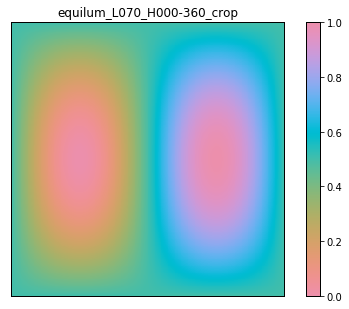

In [5]:
maps.test_cmaps(names=["equilum_L070_H000-360_crop"],fname="")

Because the eye cannot see clear edges, the colours may seem to be vibrating. Such a colour map is maybe more useful for discrete sampling, e.g. applied to a set of curves. Its interest is to produce a rainbow palette that is far more uniform than the one made in RGB.

In [6]:
maps.make_cmap_equilum(L=70, H=[0,250], Hres=1, png_dir=png_dir)

creating cmap 'equilum_L070_H000-250_clip' for Matplotlib ( 251 steps)
writing ./maps/cmap_equilum_L070_H000-250_clip.png (32x251)
creating cmap 'equilum_L070_H000-250_crop' for Matplotlib ( 251 steps)
writing ./maps/cmap_equilum_L070_H000-250_crop.png (32x251)


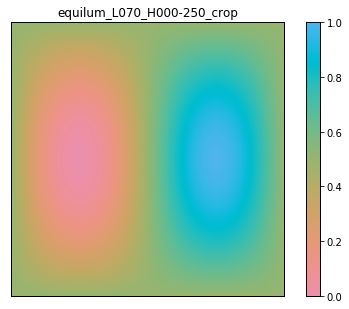

In [7]:
maps.test_cmaps(names=["equilum_L070_H000-250_crop"],fname="")

A more limited range:

In [8]:
maps.make_cmap_equilum(L=70, H=[240,0], Hres=1, png_dir=png_dir)

creating cmap 'equilum_L070_H240-000_clip' for Matplotlib ( 122 steps)
writing ./maps/cmap_equilum_L070_H240-000_clip.png (32x122)
creating cmap 'equilum_L070_H240-000_crop' for Matplotlib ( 122 steps)
writing ./maps/cmap_equilum_L070_H240-000_crop.png (32x122)


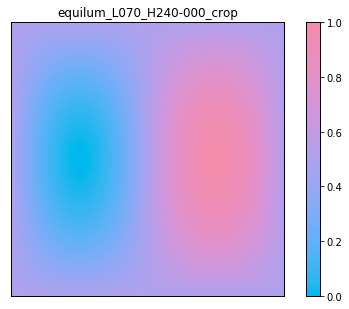

In [9]:
maps.test_cmaps(names=["equilum_L070_H240-000_crop"],fname="")

## Diverging cmaps

Function ```make_cmap_diverging()``` draws a path from H1 at max chroma to H2 at max chroma, at a given L
(if ```sym==True``` then Cmax is set for both hues, otherwise for each hue independently).

In [10]:
maps.make_cmap_diverging(H1=30+180, H2=30, L=60, Cres=1, sym=True, png_dir=png_dir)

creating cmap 'diverging_L060_H210-030_clip' for Matplotlib ( 171 steps)
writing ./maps/cmap_diverging_L060_H210-030_clip.png (32x171)
creating cmap 'diverging_L060_H210-030_crop' for Matplotlib (  69 steps)
writing ./maps/cmap_diverging_L060_H210-030_crop.png (32x69)


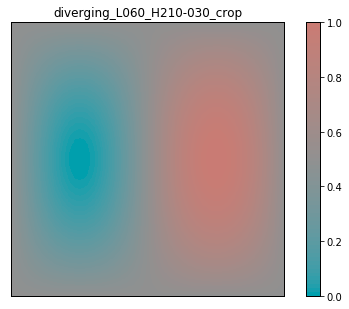

In [11]:
maps.test_cmaps(names=["diverging_L060_H210-030_crop"],fname="")

Such a colour map is useful for data that have a natural threshold value, e.g. negative and positive values. (The neutral point has to stay anchored at the chosen threshold value, even when the overal range varies.)

In [12]:
maps.make_cmap_diverging(H1=30+180, H2=30, L=60, Cres=1, sym=False, png_dir=png_dir)

creating cmap 'diverging_L060_H210-030_clip' for Matplotlib ( 180 steps)
writing ./maps/cmap_diverging_L060_H210-030_clip.png (32x180)
creating cmap 'diverging_L060_H210-030_crop' for Matplotlib ( 109 steps)
writing ./maps/cmap_diverging_L060_H210-030_crop.png (32x109)


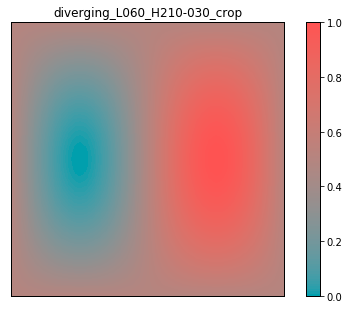

In [13]:
maps.test_cmaps(names=["diverging_L060_H210-030_crop"],fname="")

It appears that, at this L, the red at H=30 can reach a higher C than the cyan at H=210. 

Diverging cmaps can also be made 2D, with the other axis being the lightness: each row is a 1D cmap like the one plotted above. <br>
Function ```make_cmap_diverging2D()```, for a given range of L, stitches the half planes H=H1 and H=H2 along the gray axis, each extended to Cmax.<br>
(if ```sym==True``` then Cmax is set for both hues, otherwise for each hue independently)

In [14]:
maps.make_cmap_diverging2D(H1=30+180, H2=30, L=[0,100], Lres=1, Csteps=1, png_dir=png_dir)

writing ./maps/cmap_diverging2D_L000-100_H210-030_clip.png (101x1)
writing ./maps/cmap_diverging2D_L000-100_H210-030_crop.png (101x1)


Such bi-variate cmaps may be used manually, but cannot be readily used with Matplotlib (see [issue 4369](https://github.com/matplotlib/matplotlib/issues/4369)).

## Mono-hue cmaps

Function ```make_cmap_monohue()```, for a given H, draws a path from L[0] to L[1] at the maximal C. 
(if ```sym==True``` then Cmax is set for both L and 100-L, otherwise for each L independently).

In [15]:
maps.make_cmap_monohue(H=30, L=[  0, 50], Lres=1, sym=True, png_dir=png_dir)
maps.make_cmap_monohue(H=30, L=[100, 50], Lres=1, sym=True, png_dir=png_dir)
maps.make_cmap_monohue(H=30, L=[  0,100], Lres=1, sym=True, png_dir=png_dir)

creating cmap 'monohue_L000-050_H030_clip' for Matplotlib (  51 steps)
writing ./maps/cmap_monohue_L000-050_H030_clip.png (32x51)
creating cmap 'monohue_L000-050_H030_crop' for Matplotlib (  51 steps)
writing ./maps/cmap_monohue_L000-050_H030_crop.png (32x51)
creating cmap 'monohue_L100-050_H030_clip' for Matplotlib (  51 steps)
writing ./maps/cmap_monohue_L100-050_H030_clip.png (32x51)
creating cmap 'monohue_L100-050_H030_crop' for Matplotlib (  51 steps)
writing ./maps/cmap_monohue_L100-050_H030_crop.png (32x51)
creating cmap 'monohue_L000-100_H030_clip' for Matplotlib ( 101 steps)
writing ./maps/cmap_monohue_L000-100_H030_clip.png (32x101)
creating cmap 'monohue_L000-100_H030_crop' for Matplotlib ( 101 steps)
writing ./maps/cmap_monohue_L000-100_H030_crop.png (32x101)


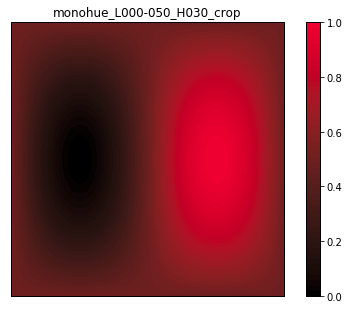

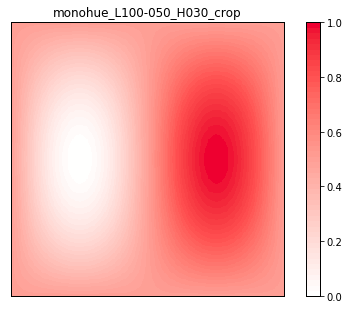

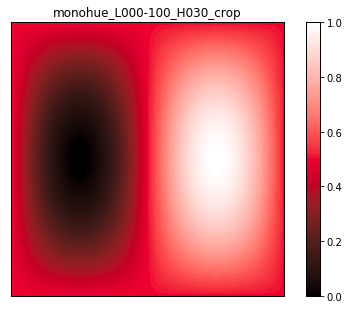

In [16]:
maps.test_cmaps(names=["monohue_L000-050_H030_crop","monohue_L100-050_H030_crop","monohue_L000-100_H030_crop"],fname="")

When using such cmaps hue can be used to code something other than the data value, e.g. a data category.

## A selection of cmaps

Function ```make_cmap_favs(types,modes,targets)``` generates and writes a set of predefined cmaps of the above types. (Note that, for each case in ```types``` and ```modes```, the ```CMAP``` dictionnary will be reset.)

Function ```plot_cmaps()``` plots all the cmaps present in ```CMAP```, and writes them as PNG images of normalized width and height.

In [17]:
figsize_x = 10
figsize_y = 0.8

### Equi-luminant

In [18]:
maps.make_cmap_favs(types=['equilum'], modes=['crop'], targets=['mpl','png'], dir=png_dir, plot=False)

-------
equilum
-------
writing ./maps/cmap_equilum_L020_H000-250_crop.png (32x251)
writing ./maps/cmap_equilum_L030_H000-250_crop.png (32x251)
writing ./maps/cmap_equilum_L040_H000-250_crop.png (32x251)
writing ./maps/cmap_equilum_L050_H000-250_crop.png (32x251)
writing ./maps/cmap_equilum_L060_H000-250_crop.png (32x251)
writing ./maps/cmap_equilum_L070_H000-250_crop.png (32x251)
writing ./maps/cmap_equilum_L080_H000-250_crop.png (32x251)
creating cmap 'equilum_L020_H000-250_crop' for Matplotlib ( 501 steps)
creating cmap 'equilum_L030_H000-250_crop' for Matplotlib ( 501 steps)
creating cmap 'equilum_L040_H000-250_crop' for Matplotlib ( 501 steps)
creating cmap 'equilum_L050_H000-250_crop' for Matplotlib ( 501 steps)
creating cmap 'equilum_L060_H000-250_crop' for Matplotlib ( 501 steps)
creating cmap 'equilum_L070_H000-250_crop' for Matplotlib ( 501 steps)
creating cmap 'equilum_L080_H000-250_crop' for Matplotlib ( 501 steps)


found cmaps:  ['equilum_L080_H000-250_crop', 'equilum_L070_H000-250_crop', 'equilum_L060_H000-250_crop', 'equilum_L050_H000-250_crop', 'equilum_L040_H000-250_crop', 'equilum_L030_H000-250_crop', 'equilum_L020_H000-250_crop']
writing  ./maps/cmap256_equilum_L080_H000-250_crop.png
writing  ./maps/cmap256_equilum_L070_H000-250_crop.png
writing  ./maps/cmap256_equilum_L060_H000-250_crop.png
writing  ./maps/cmap256_equilum_L050_H000-250_crop.png
writing  ./maps/cmap256_equilum_L040_H000-250_crop.png
writing  ./maps/cmap256_equilum_L030_H000-250_crop.png
writing  ./maps/cmap256_equilum_L020_H000-250_crop.png
writing  ./maps/cmaps.png


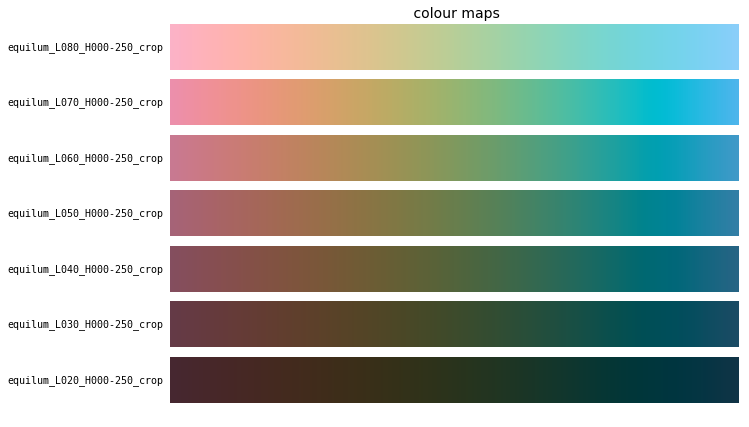

In [19]:
maps.plot_cmaps(figsize=(figsize_x,figsize_y*7), dir=png_dir)

In [20]:
maps.make_cmap_favs(types=['equilum'], modes=['clip'], targets=['mpl','png'], dir=png_dir, plot=False)

-------
equilum
-------
writing ./maps/cmap_equilum_L020_H000-250_clip.png (32x251)
writing ./maps/cmap_equilum_L030_H000-250_clip.png (32x251)
writing ./maps/cmap_equilum_L040_H000-250_clip.png (32x251)
writing ./maps/cmap_equilum_L050_H000-250_clip.png (32x251)
writing ./maps/cmap_equilum_L060_H000-250_clip.png (32x251)
writing ./maps/cmap_equilum_L070_H000-250_clip.png (32x251)
writing ./maps/cmap_equilum_L080_H000-250_clip.png (32x251)
creating cmap 'equilum_L020_H000-250_clip' for Matplotlib ( 501 steps)
creating cmap 'equilum_L030_H000-250_clip' for Matplotlib ( 501 steps)
creating cmap 'equilum_L040_H000-250_clip' for Matplotlib ( 501 steps)
creating cmap 'equilum_L050_H000-250_clip' for Matplotlib ( 501 steps)
creating cmap 'equilum_L060_H000-250_clip' for Matplotlib ( 501 steps)
creating cmap 'equilum_L070_H000-250_clip' for Matplotlib ( 501 steps)
creating cmap 'equilum_L080_H000-250_clip' for Matplotlib ( 501 steps)


found cmaps:  ['equilum_L080_H000-250_clip', 'equilum_L070_H000-250_clip', 'equilum_L060_H000-250_clip', 'equilum_L050_H000-250_clip', 'equilum_L040_H000-250_clip', 'equilum_L030_H000-250_clip', 'equilum_L020_H000-250_clip']
writing  ./maps/cmap256_equilum_L080_H000-250_clip.png
writing  ./maps/cmap256_equilum_L070_H000-250_clip.png
writing  ./maps/cmap256_equilum_L060_H000-250_clip.png
writing  ./maps/cmap256_equilum_L050_H000-250_clip.png
writing  ./maps/cmap256_equilum_L040_H000-250_clip.png
writing  ./maps/cmap256_equilum_L030_H000-250_clip.png
writing  ./maps/cmap256_equilum_L020_H000-250_clip.png
writing  ./maps/cmaps.png


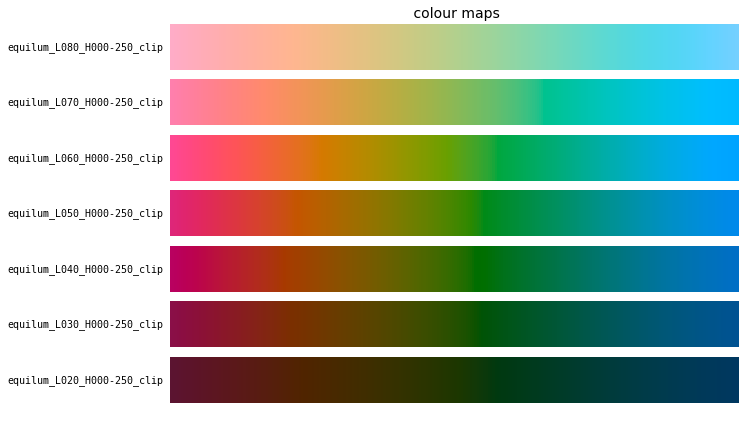

In [21]:
maps.plot_cmaps(figsize=(figsize_x,figsize_y*7), dir=png_dir)

### Diverging

In [22]:
maps.make_cmap_favs(types=['diverging'], modes=['crop'], targets=['mpl','png'], dir=png_dir, plot=False)

---------
diverging
---------
writing ./maps/cmap_diverging_L020_H210-030_crop.png (32x33)
writing ./maps/cmap_diverging_L030_H210-030_crop.png (32x41)
writing ./maps/cmap_diverging_L040_H210-030_crop.png (32x51)
writing ./maps/cmap_diverging_L050_H210-030_crop.png (32x59)
writing ./maps/cmap_diverging_L060_H210-030_crop.png (32x69)
writing ./maps/cmap_diverging_L070_H210-030_crop.png (32x77)
writing ./maps/cmap_diverging_L080_H210-030_crop.png (32x61)
writing ./maps/cmap_diverging2D_L000-100_H210-030_crop.png (101x255)
creating cmap 'diverging_L020_H210-030_crop' for Matplotlib ( 129 steps)
creating cmap 'diverging_L030_H210-030_crop' for Matplotlib ( 165 steps)
creating cmap 'diverging_L040_H210-030_crop' for Matplotlib ( 201 steps)
creating cmap 'diverging_L050_H210-030_crop' for Matplotlib ( 237 steps)
creating cmap 'diverging_L060_H210-030_crop' for Matplotlib ( 273 steps)
creating cmap 'diverging_L070_H210-030_crop' for Matplotlib ( 309 steps)
creating cmap 'diverging_L080_H210-0

found cmaps:  ['diverging_L080_H210-030_crop', 'diverging_L070_H210-030_crop', 'diverging_L060_H210-030_crop', 'diverging_L050_H210-030_crop', 'diverging_L040_H210-030_crop', 'diverging_L030_H210-030_crop', 'diverging_L020_H210-030_crop']
writing  ./maps/cmap256_diverging_L080_H210-030_crop.png
writing  ./maps/cmap256_diverging_L070_H210-030_crop.png
writing  ./maps/cmap256_diverging_L060_H210-030_crop.png
writing  ./maps/cmap256_diverging_L050_H210-030_crop.png
writing  ./maps/cmap256_diverging_L040_H210-030_crop.png
writing  ./maps/cmap256_diverging_L030_H210-030_crop.png
writing  ./maps/cmap256_diverging_L020_H210-030_crop.png
writing  ./maps/cmaps.png


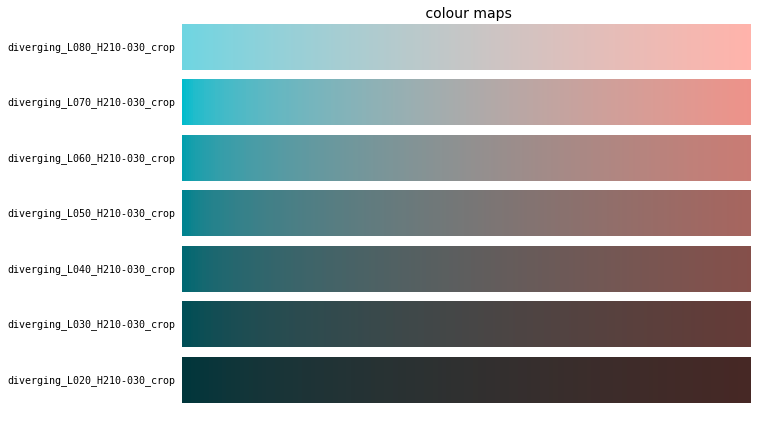

In [23]:
maps.plot_cmaps(figsize=(figsize_x,figsize_y*7), dir=png_dir)

In [24]:
maps.make_cmap_favs(types=['diverging'], modes=['clip'], targets=['mpl','png'], dir=png_dir, plot=False)

---------
diverging
---------
writing ./maps/cmap_diverging_L020_H210-030_clip.png (32x111)
writing ./maps/cmap_diverging_L030_H210-030_clip.png (32x137)
writing ./maps/cmap_diverging_L040_H210-030_clip.png (32x157)
writing ./maps/cmap_diverging_L050_H210-030_clip.png (32x167)
writing ./maps/cmap_diverging_L060_H210-030_clip.png (32x171)
writing ./maps/cmap_diverging_L070_H210-030_clip.png (32x161)
writing ./maps/cmap_diverging_L080_H210-030_clip.png (32x121)
writing ./maps/cmap_diverging2D_L000-100_H210-030_clip.png (101x255)
creating cmap 'diverging_L020_H210-030_clip' for Matplotlib ( 447 steps)
creating cmap 'diverging_L030_H210-030_clip' for Matplotlib ( 549 steps)
creating cmap 'diverging_L040_H210-030_clip' for Matplotlib ( 625 steps)
creating cmap 'diverging_L050_H210-030_clip' for Matplotlib ( 669 steps)
creating cmap 'diverging_L060_H210-030_clip' for Matplotlib ( 681 steps)
creating cmap 'diverging_L070_H210-030_clip' for Matplotlib ( 647 steps)
creating cmap 'diverging_L080

found cmaps:  ['diverging_L080_H210-030_clip', 'diverging_L070_H210-030_clip', 'diverging_L060_H210-030_clip', 'diverging_L050_H210-030_clip', 'diverging_L040_H210-030_clip', 'diverging_L030_H210-030_clip', 'diverging_L020_H210-030_clip']
writing  ./maps/cmap256_diverging_L080_H210-030_clip.png
writing  ./maps/cmap256_diverging_L070_H210-030_clip.png
writing  ./maps/cmap256_diverging_L060_H210-030_clip.png
writing  ./maps/cmap256_diverging_L050_H210-030_clip.png
writing  ./maps/cmap256_diverging_L040_H210-030_clip.png
writing  ./maps/cmap256_diverging_L030_H210-030_clip.png
writing  ./maps/cmap256_diverging_L020_H210-030_clip.png
writing  ./maps/cmaps.png


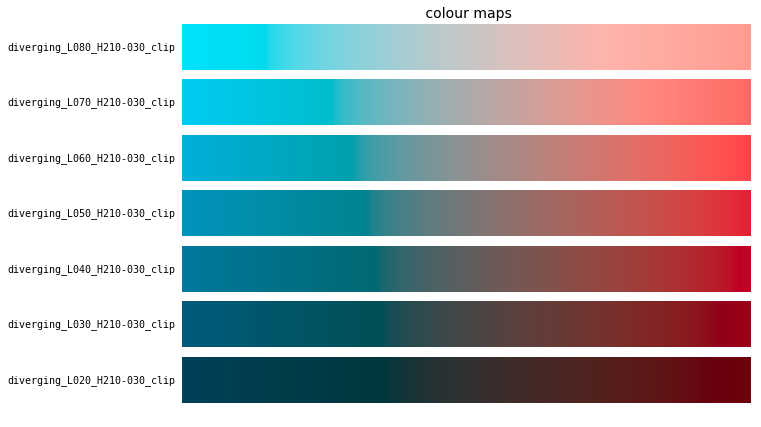

In [25]:
maps.plot_cmaps(figsize=(figsize_x,figsize_y*7), dir=png_dir)

### Mono-hue

In [26]:
maps.make_cmap_favs(types=['monohue'], modes=['crop'], targets=['mpl','png'], dir=png_dir, plot=False)

-------
monohue
-------
writing ./maps/cmap_monohue_L000-050_H040_crop.png (32x51)
writing ./maps/cmap_monohue_L100-050_H040_crop.png (32x51)
writing ./maps/cmap_monohue_L000-100_H040_crop.png (32x101)
writing ./maps/cmap_monohue_L000-050_H140_crop.png (32x51)
writing ./maps/cmap_monohue_L100-050_H140_crop.png (32x51)
writing ./maps/cmap_monohue_L000-100_H140_crop.png (32x101)
writing ./maps/cmap_monohue_L000-050_H290_crop.png (32x51)
writing ./maps/cmap_monohue_L100-050_H290_crop.png (32x51)
writing ./maps/cmap_monohue_L000-100_H290_crop.png (32x101)
creating cmap 'monohue_L000-050_H040_crop' for Matplotlib ( 501 steps)
creating cmap 'monohue_L100-050_H040_crop' for Matplotlib ( 501 steps)
creating cmap 'monohue_L000-100_H040_crop' for Matplotlib ( 501 steps)
creating cmap 'monohue_L000-050_H140_crop' for Matplotlib ( 501 steps)
creating cmap 'monohue_L100-050_H140_crop' for Matplotlib ( 501 steps)
creating cmap 'monohue_L000-100_H140_crop' for Matplotlib ( 501 steps)
creating cmap 'm

found cmaps:  ['monohue_L100-050_H040_crop', 'monohue_L100-050_H140_crop', 'monohue_L100-050_H290_crop', 'monohue_L000-050_H040_crop', 'monohue_L000-050_H140_crop', 'monohue_L000-050_H290_crop', 'monohue_L000-100_H040_crop', 'monohue_L000-100_H140_crop', 'monohue_L000-100_H290_crop']
writing  ./maps/cmap256_monohue_L100-050_H040_crop.png
writing  ./maps/cmap256_monohue_L100-050_H140_crop.png
writing  ./maps/cmap256_monohue_L100-050_H290_crop.png
writing  ./maps/cmap256_monohue_L000-050_H040_crop.png
writing  ./maps/cmap256_monohue_L000-050_H140_crop.png
writing  ./maps/cmap256_monohue_L000-050_H290_crop.png
writing  ./maps/cmap256_monohue_L000-100_H040_crop.png
writing  ./maps/cmap256_monohue_L000-100_H140_crop.png
writing  ./maps/cmap256_monohue_L000-100_H290_crop.png
writing  ./maps/cmaps.png


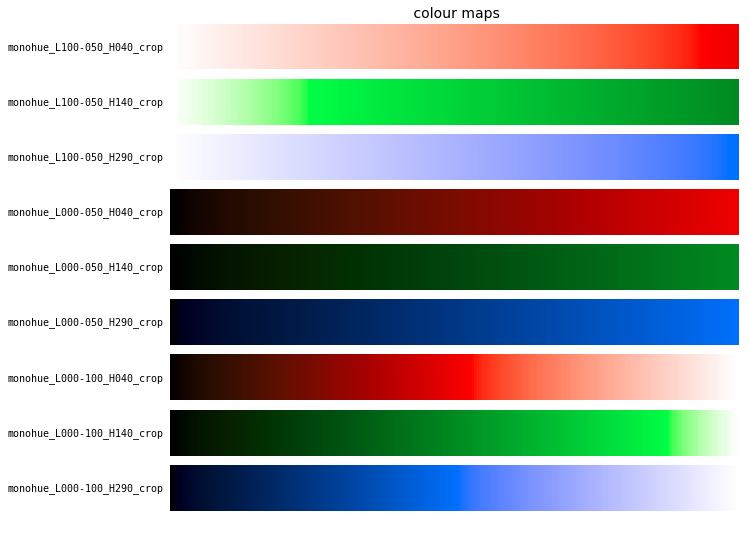

In [27]:
maps.plot_cmaps(figsize=(figsize_x,figsize_y*9), dir=png_dir)

In [28]:
maps.make_cmap_favs(types=['monohue'], modes=['clip'], targets=['mpl','png'], dir=png_dir, plot=False)

-------
monohue
-------
writing ./maps/cmap_monohue_L000-050_H040_clip.png (32x51)
writing ./maps/cmap_monohue_L100-050_H040_clip.png (32x51)
writing ./maps/cmap_monohue_L000-100_H040_clip.png (32x101)
writing ./maps/cmap_monohue_L000-050_H140_clip.png (32x51)
writing ./maps/cmap_monohue_L100-050_H140_clip.png (32x51)
writing ./maps/cmap_monohue_L000-100_H140_clip.png (32x101)
writing ./maps/cmap_monohue_L000-050_H290_clip.png (32x51)
writing ./maps/cmap_monohue_L100-050_H290_clip.png (32x51)
writing ./maps/cmap_monohue_L000-100_H290_clip.png (32x101)
creating cmap 'monohue_L000-050_H040_clip' for Matplotlib ( 501 steps)
creating cmap 'monohue_L100-050_H040_clip' for Matplotlib ( 501 steps)
creating cmap 'monohue_L000-100_H040_clip' for Matplotlib ( 501 steps)
creating cmap 'monohue_L000-050_H140_clip' for Matplotlib ( 501 steps)
creating cmap 'monohue_L100-050_H140_clip' for Matplotlib ( 501 steps)
creating cmap 'monohue_L000-100_H140_clip' for Matplotlib ( 501 steps)
creating cmap 'm

found cmaps:  ['monohue_L100-050_H040_clip', 'monohue_L100-050_H140_clip', 'monohue_L100-050_H290_clip', 'monohue_L000-050_H040_clip', 'monohue_L000-050_H140_clip', 'monohue_L000-050_H290_clip', 'monohue_L000-100_H040_clip', 'monohue_L000-100_H140_clip', 'monohue_L000-100_H290_clip']
writing  ./maps/cmap256_monohue_L100-050_H040_clip.png
writing  ./maps/cmap256_monohue_L100-050_H140_clip.png
writing  ./maps/cmap256_monohue_L100-050_H290_clip.png
writing  ./maps/cmap256_monohue_L000-050_H040_clip.png
writing  ./maps/cmap256_monohue_L000-050_H140_clip.png
writing  ./maps/cmap256_monohue_L000-050_H290_clip.png
writing  ./maps/cmap256_monohue_L000-100_H040_clip.png
writing  ./maps/cmap256_monohue_L000-100_H140_clip.png
writing  ./maps/cmap256_monohue_L000-100_H290_clip.png
writing  ./maps/cmaps.png


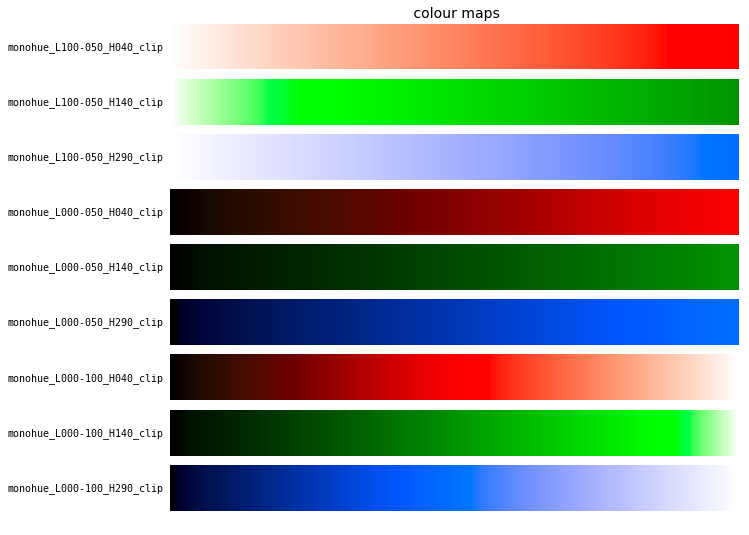

In [29]:
maps.plot_cmaps(figsize=(figsize_x,figsize_y*9), dir=png_dir)

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img align="left" alt="Creative Commons License" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br>
<br>Gilles Ferrand
<br>2019-12-09